# **Homework 5 - USA Airport Flight Analysis**

## Importing necessary libraries

In [3]:
import numpy as np 
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import functions.analysis as analysis
import functions.summarize as summarize
import zipfile

In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download flashgordon/usa-airport-dataset

*Unzip the file with the dataset downloaded from Kaggle:*

In [5]:
# Unzip the file we downloaded from kaggle
zip_file_path = 'usa-airport-dataset.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('.')  # Extract files to the current working directory

## 1. Flight Network Analysis (Q1)

### Basic analysis

In [6]:
# Loading dataset
df = pd.read_csv("Airports2.csv")
df

,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,Fly_date,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long
0,MHK,AMW,"Manhattan, KS","Ames, IA",21,30,1,254,2008-10-01,122049,86219,39.140999,-96.670799,NaN,NaN
1,EUG,RDM,"Eugene, OR","Bend, OR",41,396,22,103,1990-11-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
2,EUG,RDM,"Eugene, OR","Bend, OR",88,342,19,103,1990-12-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
3,EUG,RDM,"Eugene, OR","Bend, OR",11,72,4,103,1990-10-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
4,MFR,RDM,"Medford, OR","Bend, OR",0,18,1,156,1990-02-01,147300,76034,42.374199,-122.873001,44.254101,-121.150002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3606798,STL,TBN,"St. Louis, MO","Fort Leonard Wood, MO",281,969,51,119,2009-02-01,2828990,46457,38.748699,-90.370003,37.741600,-92.140701
3606799,STL,TBN,"St. Louis, MO","Fort Leonard Wood, MO",245,1026,54,119,2009-11-01,2828990,46457,38.748699,-90.370003,37.741600,-92.140701
3606800,STL,TBN,"St. Louis, MO","Fort Leonard Wood, MO",363,1273,67,119,2009-08-01,2828990,46457,38.748699,-90.370003,37.741600,-92.140701
3606801,CGI,TBN,"Cape Girardeau, MO","Fort Leonard Wood, MO",2,19,1,146,2009-08-01,93712,46457,37.225300,-89.570801,37.741600,-92.140701


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3606803 entries, 0 to 3606802
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Origin_airport          object 
 1   Destination_airport     object 
 2   Origin_city             object 
 3   Destination_city        object 
 4   Passengers              int64  
 5   Seats                   int64  
 6   Flights                 int64  
 7   Distance                int64  
 8   Fly_date                object 
 9   Origin_population       int64  
 10  Destination_population  int64  
 11  Org_airport_lat         float64
 12  Org_airport_long        float64
 13  Dest_airport_lat        float64
 14  Dest_airport_long       float64
dtypes: float64(4), int64(6), object(5)
memory usage: 412.8+ MB


In [8]:
df.describe()

,Passengers,Seats,Flights,Distance,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long
count,3.606803e+06,3.606803e+06,3.606803e+06,3.606803e+06,3.606803e+06,3.606803e+06,3.599849e+06,3.599849e+06,3.599996e+06,3.599996e+06
mean,2.688910e+03,4.048297e+03,3.722890e+01,6.973190e+02,5.871502e+06,5.897982e+06,3.775029e+01,-9.186178e+01,3.774091e+01,-9.183433e+01
std,4.347617e+03,6.200871e+03,4.961970e+01,6.044165e+02,7.858062e+06,7.906127e+06,5.765453e+00,1.653773e+01,5.736556e+00,1.647228e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.300500e+04,1.288700e+04,1.972140e+01,-1.579220e+02,1.972140e+01,-1.579220e+02
25%,1.090000e+02,1.560000e+02,2.000000e+00,2.730000e+02,1.030597e+06,1.025470e+06,3.363670e+01,-9.703800e+01,3.363670e+01,-9.703800e+01
50%,1.118000e+03,1.998000e+03,2.500000e+01,5.190000e+02,2.400193e+06,2.400193e+06,3.885210e+01,-8.775240e+01,3.885210e+01,-8.775240e+01
75%,3.503000e+03,5.370000e+03,5.500000e+01,9.270000e+02,8.613622e+06,8.635706e+06,4.173260e+01,-8.029060e+01,4.173260e+01,-8.029060e+01
max,8.959700e+04,1.470620e+05,1.128000e+03,5.095000e+03,3.813959e+07,3.813959e+07,6.483750e+01,-6.882810e+01,6.483750e+01,-6.882810e+01


In [9]:
df.isnull().sum()

Origin_airport               0
Destination_airport          0
Origin_city                  0
Destination_city             0
Passengers                   0
Seats                        0
Flights                      0
Distance                     0
Fly_date                     0
Origin_population            0
Destination_population       0
Org_airport_lat           6954
Org_airport_long          6954
Dest_airport_lat          6807
Dest_airport_long         6807
dtype: int64

In [10]:
df.duplicated().sum()

41753

In [11]:
df = df.drop_duplicates()

### 1.1 Computing function

In [12]:
# Creating the flight network graph
flight_network = nx.DiGraph()
for _, row in df.iterrows():
    flight_network.add_edge(row['Origin_airport'], row['Destination_airport'])

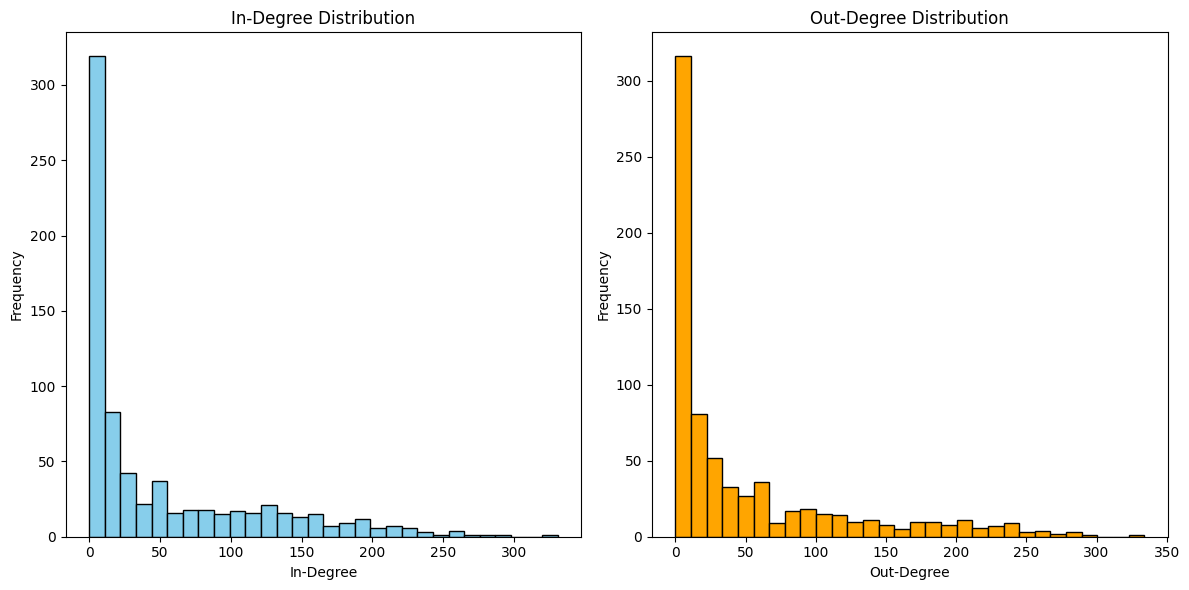

{'num_nodes': 727,
 'num_edges': 36719,
 'density': 0.1391392984490396,
 'in_degree': {'MHK': 96,
  'AMW': 1,
  'EUG': 78,
  'RDM': 54,
  'MFR': 52,
  'SEA': 188,
  'PDX': 158,
  'LMT': 22,
  'SFO': 164,
  'LAX': 207,
  'EAT': 18,
  'YKM': 68,
  'EKO': 150,
  'SLE': 17,
  'GEG': 126,
  'RDD': 49,
  'LWS': 55,
  'AST': 3,
  'CLM': 13,
  'PDT': 15,
  'SJC': 146,
  'ACV': 23,
  'PUW': 48,
  'SMF': 116,
  'FLL': 181,
  'PHX': 225,
  'BFI': 141,
  'GGG': 108,
  'GTF': 89,
  'FAT': 111,
  'TUS': 212,
  'MWH': 56,
  'BIL': 109,
  'DFW': 251,
  'RBG': 5,
  'SLC': 219,
  'CPR': 79,
  'RNO': 159,
  'FBK': 14,
  'ANC': 114,
  'BIF': 79,
  'CIC': 11,
  'SAF': 23,
  'ABQ': 181,
  'FSM': 107,
  'LAS': 227,
  'DQF': 53,
  'ICT': 189,
  'AZA': 74,
  'DLH': 111,
  'CEC': 13,
  'OKC': 241,
  'SAN': 143,
  'STS': 17,
  'DRO': 33,
  'OAK': 173,
  'IAH': 217,
  'ELP': 198,
  'DBQ': 41,
  'HLN': 54,
  'TUL': 186,
  'OMA': 186,
  'ACT': 151,
  'BTM': 20,
  'AUS': 178,
  'PIA': 164,
  'CWA': 80,
  'PUB': 123,

In [13]:
analysis.analyse_graph_features(flight_network)

### 1.2 Summarizing function

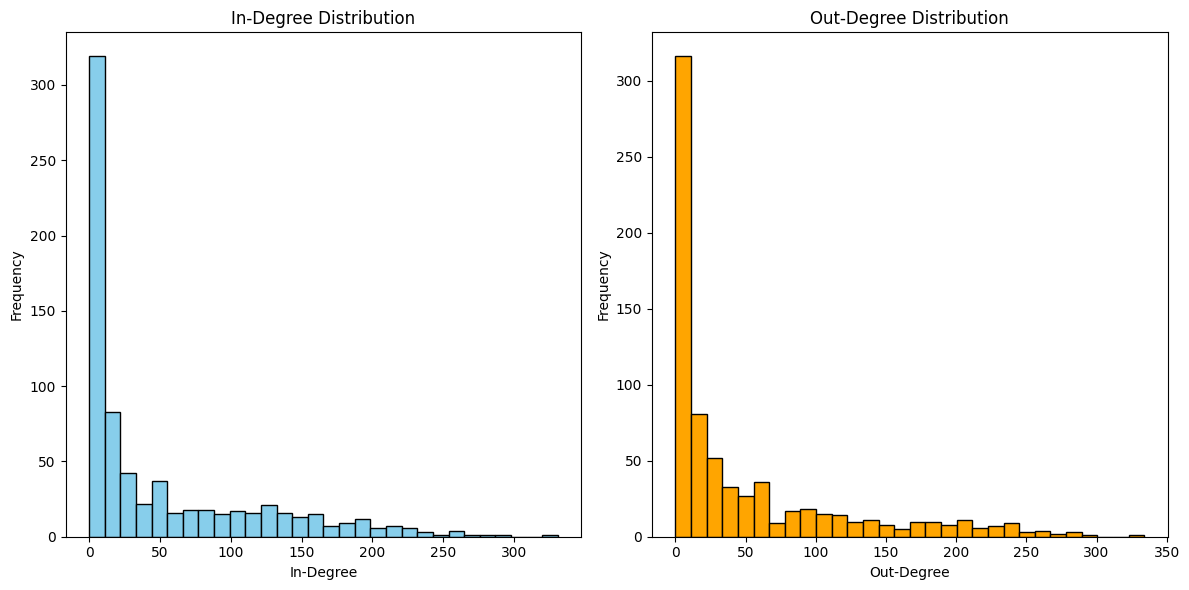

Graph Summary Report:
Number of airports (nodes): 727
Number of flights (edges): 36719
Graph Density: 0.1391
Graph Type: Dense

Identified Hubs (Airports with high degree):
   Node  In-Degree  Out-Degree  Total Degree
0   SLC        219         249           468
1   DTW        231         240           471
2   MEM        277         287           564
3   IAH        217         241           458
4   GSO        144         175           319
..  ...        ...         ...           ...
73  YIP        331         334           665
74  SAN        143         196           339
75  OKC        241         238           479
76  LGA        146         189           335
77  SEA        188         216           404

[78 rows x 4 columns]


In [14]:
summarize.summarize_graph_features(flight_network)

### 1.3 Deeper analysis

In [15]:
total_passengers = (df.groupby(['Origin_city', 'Destination_city'])['Passengers'].sum()
                    .reset_index().rename(columns={"Passengers": "Total_passengers"}))
total_passengers_df = total_passengers[['Origin_city', 'Destination_city', 'Total_passengers']]

In [16]:
total_passengers_df

,Origin_city,Destination_city,Total_passengers
0,"Aberdeen, SD","Anchorage, AK",2
1,"Aberdeen, SD","Billings, MT",100
2,"Aberdeen, SD","Bismarck, ND",67
3,"Aberdeen, SD","Brainerd, MN",32
4,"Aberdeen, SD","Eau Claire, WI",32
...,...,...,...
30326,"Yuma, AZ","Yuma, AZ",0
30327,"Zanesville, OH","Atlanta, GA",0
30328,"Zanesville, OH","Detroit, MI",0
30329,"Zanesville, OH","Kansas City, MO",0


In [17]:
# Sorting to find busiest routes by passengers flow
busiest_routes = total_passengers.sort_values(by='Total_passengers', ascending=False)
busiest_routes = busiest_routes.head(20)

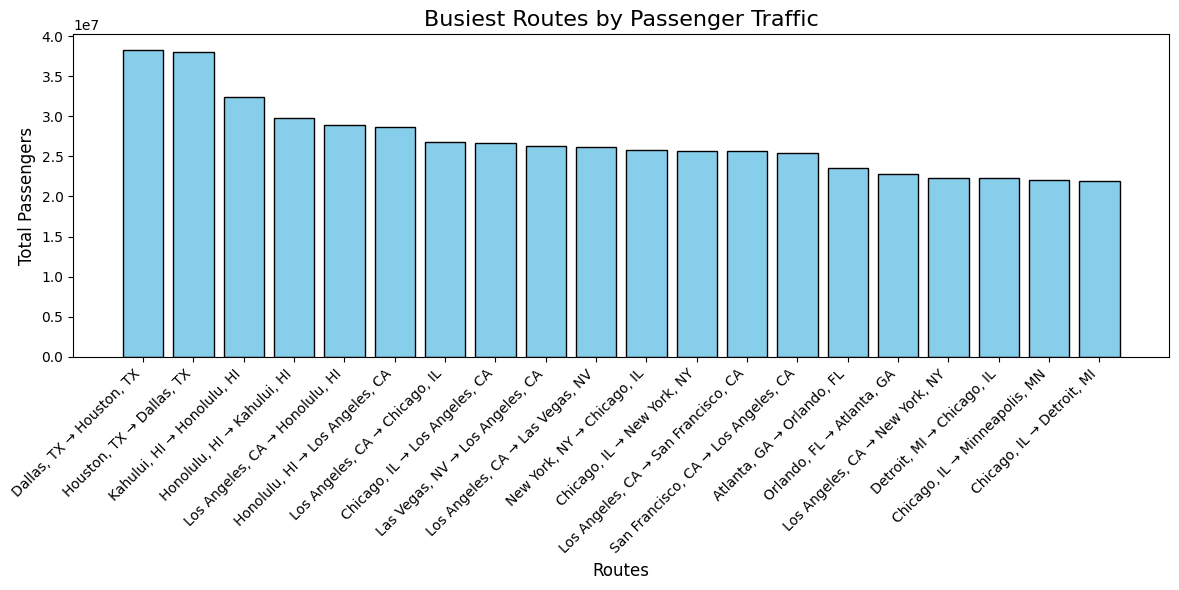

In [18]:
# Visualise the results
plt.figure(figsize=(12, 6))
plt.bar(
    busiest_routes["Origin_city"] + " → " + busiest_routes["Destination_city"],
    busiest_routes["Total_passengers"],
    color="skyblue",
    edgecolor="black"
)

plt.title("Busiest Routes by Passenger Traffic", fontsize=16)
plt.xlabel("Routes", fontsize=12)
plt.ylabel("Total Passengers", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.tight_layout()
plt.show()

In [19]:
# Calculate the average passengers per flight for each route and highlight under/over-utilized connections.

# Add Total_flights column
total_flights_df = (
    df.groupby(["Origin_city", "Destination_city"])["Flights"]
    .sum()
    .reset_index()
    .rename(columns={"Flights": "Total_flights"})
)
total_flights_df = total_flights_df[['Origin_city', 'Destination_city', 'Total_flights']]

# Merge the two DataFrames
route_stats = pd.merge(total_passengers_df, total_flights_df, on=["Origin_city", "Destination_city"])

# Avoid division by 0 and null values and calculate the average passengers per flight
route_stats["Avg_pass_per_flight"] = np.where(
    (route_stats["Total_flights"] > 0) & (route_stats['Total_passengers'] > 0),
    (route_stats["Total_passengers"] / route_stats["Total_flights"]),
    0  
)

# Display the results
route_stats


,Origin_city,Destination_city,Total_passengers,Total_flights,Avg_pass_per_flight
0,"Aberdeen, SD","Anchorage, AK",2,1,2.0
1,"Aberdeen, SD","Billings, MT",100,1,100.0
2,"Aberdeen, SD","Bismarck, ND",67,2,33.5
3,"Aberdeen, SD","Brainerd, MN",32,1,32.0
4,"Aberdeen, SD","Eau Claire, WI",32,1,32.0
...,...,...,...,...,...
30326,"Yuma, AZ","Yuma, AZ",0,2,0.0
30327,"Zanesville, OH","Atlanta, GA",0,5,0.0
30328,"Zanesville, OH","Detroit, MI",0,3,0.0
30329,"Zanesville, OH","Kansas City, MO",0,1,0.0


In [20]:
# Define thresholds for under-utilized and over-utilized connections
under_utilized_threshold = route_stats["Avg_pass_per_flight"].quantile(0.3)
over_utilized_threshold = route_stats["Avg_pass_per_flight"].quantile(0.7)

# Highlight under-utilized and over-utilized connections
route_stats["Utilization"] = pd.cut(
    route_stats["Avg_pass_per_flight"],
    bins=[-float("inf"), under_utilized_threshold, over_utilized_threshold, float("inf")],
    labels=["Under-Utilized", "Moderately Utilized", "Over-Utilized"]
)
route_stats

,Origin_city,Destination_city,Total_passengers,Total_flights,Avg_pass_per_flight,Utilization
0,"Aberdeen, SD","Anchorage, AK",2,1,2.0,Under-Utilized
1,"Aberdeen, SD","Billings, MT",100,1,100.0,Over-Utilized
2,"Aberdeen, SD","Bismarck, ND",67,2,33.5,Moderately Utilized
3,"Aberdeen, SD","Brainerd, MN",32,1,32.0,Moderately Utilized
4,"Aberdeen, SD","Eau Claire, WI",32,1,32.0,Moderately Utilized
...,...,...,...,...,...,...
30326,"Yuma, AZ","Yuma, AZ",0,2,0.0,Under-Utilized
30327,"Zanesville, OH","Atlanta, GA",0,5,0.0,Under-Utilized
30328,"Zanesville, OH","Detroit, MI",0,3,0.0,Under-Utilized
30329,"Zanesville, OH","Kansas City, MO",0,1,0.0,Under-Utilized


In [ ]:
### Missing geomap

### 1.4 Report

### 1.5 Questions to address

## **2. Nodes' Contribution (Q2)**

*In any network, certain nodes (airports, in this case) play a critical role in maintaining connectivity and flow. Centrality measures are used to identify these nodes.*

**Your Task:**
Implement a function analyze_centrality(flight_network, airport) that computes the following centrality measures for a given airport:

- Betweenness centrality: Measures how often a node appears on the shortest paths between other nodes.
- Closeness centrality: Measures how easily a node can access all other nodes in the network.
- Degree centrality: Simply counts the number of direct connections to the node.
- PageRank: Computes the "importance" of a node based on incoming connections and their weights.

Write a function compare_centralities(flight_network) to:

- Compute and compare centrality values for all nodes in the graph.
- Plot centrality distributions (histograms for each centrality measure).
- Return the top 5 airports for each centrality measure.
- Ask LLM (eg. ChatGPT) to suggest alternative centrality measures that might be relevant to this task. How can you check that the results given by the LLM are trustable?

Implement one of these measures suggested by the LLM, compare its results to the centralities you've already computed, and analyze whether it adds any new insights.

In [22]:
import zipfile
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import re
from nltk.corpus import stopwords

from collections import defaultdict

import random

from tqdm import tqdm

from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score


import time

In [21]:
# Save CSV files in pandas df
airport2 = df

# Explanation of Centrality Measures Mathematically

This document explains the **mathematics** behind the centrality measures you are implementing for your flight network. The centrality measures discussed here are:

1. **Betweenness Centrality**
2. **Closeness Centrality**
3. **Degree Centrality**

---

## **1. Betweenness Centrality**

### **Definition**
Betweenness centrality measures how often a node lies on the shortest paths between other nodes in a graph. It quantifies the importance of a node in controlling communication or flow within a network.

### **Mathematical Formula**
For a node $v$, betweenness centrality is:
$$
C_B(v) = \sum_{s \neq v \neq t} \frac{\sigma_{s,t}(v)}{\sigma_{s,t}}
$$
Where:
- $\sigma_{s,t} $: Total number of shortest paths from node $ s $to $ t $.
- $\sigma_{s,t}(v) $: Number of those paths that pass through $v $.

### **Steps to Compute Betweenness Centrality**
1. For each pair of nodes $s $ and $ t$in the graph:
   - Compute all shortest paths between $ s $ and $t $.
   - Count how many of these paths pass through the node $v$.
2. Sum the fraction of paths that pass through $v$ for all $s$ and $t$, where $s$ $\neq v \neq t$.

---

## **2. Closeness Centrality**

### **Definition**
Closeness centrality measures how "close" a node is to all other nodes in the network. It is the reciprocal of the average shortest path distance from the node to all other nodes.

### **Mathematical Formula**
For a node $ v $, closeness centrality is:
$$
C_C(v) = \frac{1}{\sum_{u \in V} d(v, u)}
$$
Where:
- $ d(v, u) $: Shortest distance from node $v$ to node $u$.
- $V$: Set of all nodes in the graph.

### **Steps to Compute Closeness Centrality**
1. Compute the shortest path from $v$ to every other node $u$ in the graph.
2. Sum up all these shortest path distances: $ \text{Total Distance} = \sum_{u} d(v, u)$.
3. Take the reciprocal of the total distance to get closeness centrality.

---

## **3. Degree Centrality**

### **Definition**
Degree centrality is the simplest centrality measure. It counts the number of direct connections (edges) a node has in the graph.

### **Mathematical Formula**
For a node $v$, degree centrality is:
$$
C_D(v) = \text{degree}(v)
$$
Where:
- $\text{degree}(v) $: Number of edges connected to node $v$.

### **Steps to Compute Degree Centrality**
1. Count all the direct neighbors (connections) of node $v$.
2. If the graph is **directed**, you can compute:
   - **In-degree**: Number of edges coming into $v$.
   - **Out-degree**: Number of edges going out of $v$.

---

## **Comparing Centrality Measures**

To compare the centrality measures (e.g., closeness, betweenness, and degree), you can:
1. Normalize the centrality values so that they are comparable across nodes.
2. Use scatter plots or rankings to analyze how each airport (node) ranks differently based on the chosen measure.
3. Analyze the network's structural role for each node based on its centrality score.

---

## **General Notes**

- **Graph Representation:** Ensure your graph is correctly represented with nodes as airports and edges as direct flights.
- **Shortest Paths:** Use algorithms like Dijkstra’s or Floyd-Warshall to compute shortest paths efficiently.
- **Directed vs. Undirected:** Take into account whether your network is directed (flights have direction) or undirected.

By understanding these mathematical concepts, you can confidently implement and interpret centrality measures in your network analysis.

# Centrality Measures in Networks: A Comprehensive Guide

This document provides a detailed explanation of how to calculate four major centrality measures for a network, focusing on their mathematical definitions, implementation logic, and coding steps. These measures are:
1. **Betweenness Centrality**
2. **Closeness Centrality**
3. **Degree Centrality**
4. **PageRank**

---

## **1. Betweenness Centrality**

### **Definition**
Betweenness centrality quantifies the number of times a node lies on the shortest paths between pairs of other nodes in a graph. It measures the importance of a node in controlling information flow.

$$
C_B(v) = \sum_{s \neq v \neq t} \frac{\sigma_{s,t}(v)}{\sigma_{s,t}}
$$

Where:
- $ \sigma_{s,t} $: Total number of shortest paths from node $ s $ to node $ t $.
- $ \sigma_{s,t}(v) $: Number of shortest paths from $s$ to $t$ that pass through $ v $.

### **Steps to Calculate**
1. Compute all shortest paths for every pair of nodes $ (s, t)$.
2. Count the paths that pass through the target node $v$.
3. For each pair $(s, t) $, calculate the fraction $ \frac{\sigma_{s,t}(v)}{\sigma_{s,t}} $.
4. Sum these fractions for all $s, t$ pairs.

### **Implementation Logic**
- Use **Breadth-First Search (BFS)** for unweighted graphs or **Dijkstra’s Algorithm** for weighted graphs to calculate shortest paths.
- Track how many paths pass through the target node.

---


In [23]:
def compute_betweenness_centrality(graph, airport):
    nodes = list(graph.keys())
    betweenness = 0

    for source in nodes:
        for target in nodes:
            if source == target or source == airport or target == airport:
                continue
            # Compute all shortest paths from source to target
            paths = find_all_shortest_paths(graph, source, target)
            total_paths = len(paths)
            passing_paths = sum(1 for path in paths if airport in path)
            betweenness += passing_paths / total_paths

    return betweenness

def find_all_shortest_paths(graph, source, target):
    # Perform BFS to find all shortest paths
    queue = [[source]]
    shortest_paths = []
    visited = set()

    while queue:
        path = queue.pop(0)
        node = path[-1]

        if node in visited:
            continue
        visited.add(node)

        for neighbor in graph[node]:
            new_path = list(path)
            new_path.append(neighbor)

            if neighbor == target:
                shortest_paths.append(new_path)
            else:
                queue.append(new_path)

    return shortest_paths

## **2. Closeness Centrality**

### **Definition**
Closeness centrality measures how close a node is to all other nodes in the network. It is calculated as the reciprocal of the sum of the shortest path distances from a node to all other nodes.

$$
C_C(v) = \frac{1}{\sum_{u \in V} d(v, u)}
$$

Where:
- $ d(v, u)$: Shortest path distance from node $ v$ to node $u$.
- $ V $: Set of all nodes in the graph.

### **Steps to Calculate**
1. Compute the shortest path distances $d(v, u)$ from the target node $ v $ to all other nodes $ u$.
2. Sum these distances.
3. Take the reciprocal of the total distance.

### **Implementation Logic**
- Perform a BFS or Dijkstra’s algorithm starting from the target node $v$ to calculate all shortest path distances.
- Ensure the result accounts for disconnected nodes (i.e., distances that remain infinite).

---

In [24]:
def compute_closeness_centrality(graph, airport):
    distances = bfs_shortest_distances(graph, airport)
    total_distance = sum(distances.values())
    if total_distance > 0:
        return 1 / total_distance
    else:
        return 0

def bfs_shortest_distances(graph, start):
    # BFS to compute shortest distances
    distances = {node: float('inf') for node in graph.keys()}
    distances[start] = 0
    queue = [start]

    while queue:
        current = queue.pop(0)

        for neighbor in graph[current]:
            if distances[neighbor] == float('inf'):  # Not visited
                distances[neighbor] = distances[current] + 1
                queue.append(neighbor)

    return distances

## **3. Degree Centrality**

### **Definition**
Degree centrality is the simplest measure and counts the number of direct connections a node has.

$$
C_D(v) = \text{degree}(v)
$$

Where:
- $ \text{degree}(v) $: Number of edges directly connected to the node $v$.

### **Steps to Calculate**
1. Count the number of neighbors of the target node $v$.
2. For directed graphs:
   - Compute **in-degree**: Number of incoming edges.
   - Compute **out-degree**: Number of outgoing edges.

### **Implementation Logic**
- Traverse the graph to count the neighbors of the node.
- For weighted graphs, optionally sum the edge weights.

---

In [26]:
def compute_degree_centrality(graph, airport):
    return len(graph[airport])

## **4. PageRank**

### **Definition**
PageRank is an iterative algorithm that calculates the importance of a node based on its incoming connections. The rank of a node depends on the rank of its neighbors, with a damping factor to ensure convergence.

$$
PR(v) = \frac{1 - \alpha}{N} + \alpha \sum_{u \in \text{In}(v)} \frac{PR(u)}{\text{OutDegree}(u)}
$$

Where:
- $ \alpha $: Damping factor, typically set to 0.85.
- $ N $: Total number of nodes.
- $ \text{In}(v) $: Set of nodes linking to $ v $.
- $ \text{OutDegree}(u) $: Number of outgoing edges from node $u $.

### **Steps to Calculate**
1. Initialize all nodes with an equal rank $ \frac{1}{N} $.
2. Iteratively update ranks based on the ranks of incoming neighbors.
3. Stop when the change in ranks is below a tolerance threshold.

### **Implementation Logic**
- Normalize ranks at each step to ensure they sum to 1.
- Use a convergence threshold (e.g., $ 10^{-6} $) to terminate the iteration.


In [27]:
def compute_pagerank(graph, airport, alpha=0.85, max_iter=100, tol=1e-6):
    nodes = list(graph.keys())
    N = len(nodes)
    pagerank = {node: 1 / N for node in nodes}
    new_pagerank = pagerank.copy()

    for _ in range(max_iter):
        for node in nodes:
            new_pagerank[node] = (1 - alpha) / N
            for neighbor in graph:
                if node in graph[neighbor]:
                    new_pagerank[node] += alpha * (pagerank[neighbor] / len(graph[neighbor]))

        # Check for convergence
        if max(abs(new_pagerank[node] - pagerank[node]) for node in nodes) < tol:
            break
        pagerank = new_pagerank.copy()

    return pagerank.get(airport, 0)

##### **References**
1.	Wikipedia: Centrality : <https://en.wikipedia.org/wiki/Centrality>

2.	GeeksforGeeks: Graph Algorithms : <https://www.geeksforgeeks.org/graph-data-structure-and-algorithms/>

3.	PageRank Algorithm Explained : <https://en.wikipedia.org/wiki/PageRank>

4.	Network Analysis with Python : <https://networkx.org/>

## Different approach : more adtaped for airport task : 

In [31]:
def betweenness_centrality(graph):
    """
    Calcola la betweenness centrality per ogni nodo in un grafo non orientato.
    :param graph: Dizionario di adiacenza {nodo: [lista di vicini]}
    :return: Dizionario {nodo: betweenness_centrality}
    """
    from collections import deque

    centrality = {node: 0.0 for node in graph}

    for s in graph:
        # Strutture dati per BFS
        stack = []
        pred = {w: [] for w in graph}
        sigma = {w: 0 for w in graph}
        dist = {w: -1 for w in graph}

        sigma[s] = 1
        dist[s] = 0
        queue = deque([s])

        # BFS
        while queue:
            v = queue.popleft()
            stack.append(v)
            for w in graph[v]:
                if dist[w] < 0:
                    queue.append(w)
                    dist[w] = dist[v] + 1
                if dist[w] == dist[v] + 1:
                    sigma[w] += sigma[v]
                    pred[w].append(v)

        # Calcolo delle dipendenze
        delta = {w: 0 for w in graph}
        while stack:
            w = stack.pop()
            for v in pred[w]:
                delta[v] += (sigma[v] / sigma[w]) * (1 + delta[w])
            if w != s:
                centrality[w] += delta[w]

    # Normalizzazione per grafi non orientati
    scale = 1 / ((len(graph) - 1) * (len(graph) - 2))
    for v in centrality:
        centrality[v] *= scale

    return centrality

In [32]:
def closeness_centrality(graph):
    """
    Calcola la closeness centrality per ogni nodo in un grafo.
    :param graph: Dizionario di adiacenza {nodo: [lista di vicini]}
    :return: Dizionario {nodo: closeness_centrality}
    """
    from collections import deque

    def bfs_distances(start):
        dist = {node: float('inf') for node in graph}
        dist[start] = 0
        queue = deque([start])
        while queue:
            v = queue.popleft()
            for neighbor in graph[v]:
                if dist[neighbor] == float('inf'):
                    dist[neighbor] = dist[v] + 1
                    queue.append(neighbor)
        return dist

    centrality = {}
    for node in graph:
        distances = bfs_distances(node)
        total_distance = sum(d for d in distances.values() if d != float('inf'))
        centrality[node] = (len(graph) - 1) / total_distance if total_distance > 0 else 0.0

    return centrality

In [33]:
def degree_centrality(graph):
    """
    Calcola la degree centrality per ogni nodo in un grafo.
    :param graph: Dizionario di adiacenza {nodo: [lista di vicini]}
    :return: Dizionario {nodo: degree_centrality}
    """
    n = len(graph) - 1
    centrality = {node: len(neighbors) / n for node, neighbors in graph.items()}
    return centrality

In [34]:
def pagerank(graph, alpha=0.85, max_iter=100, tol=1e-6):
    """
    Calcola il PageRank dei nodi in un grafo.
    :param graph: Dizionario di adiacenza {nodo: [lista di vicini]}
    :param alpha: Tasso di damping (default 0.85)
    :param max_iter: Iterazioni massime
    :param tol: Tolleranza di convergenza
    :return: Dizionario {nodo: pagerank}
    """
    N = len(graph)
    rank = {node: 1 / N for node in graph}
    out_degree = {node: len(neighbors) for node, neighbors in graph.items()}

    for _ in range(max_iter):
        prev_rank = rank.copy()
        for node in graph:
            rank[node] = (1 - alpha) / N + alpha * sum(
                prev_rank[neighbor] / out_degree[neighbor]
                for neighbor in graph if node in graph[neighbor]
            )
        # Verifica della convergenza
        if all(abs(rank[node] - prev_rank[node]) < tol for node in graph):
            break

    return rank

In [35]:
# Grafo di esempio
flight_network = {
    'JFK': ['LAX', 'ORD', 'ATL'],
    'LAX': ['JFK', 'ORD'],
    'ORD': ['JFK', 'LAX', 'ATL'],
    'ATL': ['JFK', 'ORD']
}

# Calcolo delle centralità
betweenness = betweenness_centrality(flight_network)
closeness = closeness_centrality(flight_network)
degree = degree_centrality(flight_network)
pagerank_scores = pagerank(flight_network)

# Output dei risultati
print("Betweenness Centrality:", betweenness)
print("Closeness Centrality:", closeness)
print("Degree Centrality:", degree)
print("PageRank:", pagerank_scores)

Betweenness Centrality: {'JFK': 0.16666666666666666, 'LAX': 0.0, 'ORD': 0.16666666666666666, 'ATL': 0.0}
Closeness Centrality: {'JFK': 1.0, 'LAX': 0.75, 'ORD': 1.0, 'ATL': 0.75}
Degree Centrality: {'JFK': 1.0, 'LAX': 0.6666666666666666, 'ORD': 1.0, 'ATL': 0.6666666666666666}
PageRank: {'JFK': 0.29521306459338925, 'LAX': 0.20478693540661072, 'ORD': 0.29521306459338925, 'ATL': 0.20478693540661072}


In [36]:
def compute_betweenness_centrality(graph, airport):
    """
    Compute betweenness centrality for a given airport.
    :param graph: Dictionary representing the adjacency list of the graph.
    :param airport: Target airport node to calculate centrality for.
    :return: Betweenness centrality value for the airport.
    """
    nodes = list(graph.keys())
    betweenness = 0

    for source in nodes:
        for target in nodes:
            if source == target or source == airport or target == airport:
                continue
            # Find all shortest paths from source to target
            paths = find_all_shortest_paths(graph, source, target)
            total_paths = len(paths)
            passing_paths = sum(1 for path in paths if airport in path)
            betweenness += passing_paths / total_paths

    return betweenness

def find_all_shortest_paths(graph, source, target):
    """
    Find all shortest paths between two nodes using BFS.
    :param graph: Dictionary representing the graph.
    :param source: Source node.
    :param target: Target node.
    :return: List of all shortest paths from source to target.
    """
    from collections import deque
    
    queue = deque([[source]])
    shortest_paths = []
    visited = set()

    while queue:
        path = queue.popleft()
        node = path[-1]

        if node in visited:
            continue
        visited.add(node)

        for neighbor in graph[node]:
            new_path = path + [neighbor]
            if neighbor == target:
                shortest_paths.append(new_path)
            else:
                queue.append(new_path)

    return shortest_paths

In [37]:
def compute_closeness_centrality(graph, airport):
    """
    Compute closeness centrality for a given airport.
    :param graph: Dictionary representing the adjacency list of the graph.
    :param airport: Target airport node to calculate centrality for.
    :return: Closeness centrality value for the airport.
    """
    distances = bfs_shortest_distances(graph, airport)
    total_distance = sum(distances.values())

    if total_distance > 0:
        return 1 / total_distance
    else:
        return 0

def bfs_shortest_distances(graph, start):
    """
    Perform BFS to calculate shortest distances from start node to all others.
    :param graph: Dictionary representing the graph.
    :param start: Start node.
    :return: Dictionary of shortest distances.
    """
    from collections import deque
    
    distances = {node: float('inf') for node in graph.keys()}
    distances[start] = 0
    queue = deque([start])

    while queue:
        current = queue.popleft()
        for neighbor in graph[current]:
            if distances[neighbor] == float('inf'):  # Not visited
                distances[neighbor] = distances[current] + 1
                queue.append(neighbor)

    return distances

In [38]:
def compute_degree_centrality(graph, airport):
    """
    Compute degree centrality for a given airport.
    :param graph: Dictionary representing the adjacency list of the graph.
    :param airport: Target airport node.
    :return: Degree centrality value.
    """
    return len(graph.get(airport, []))

In [39]:
def compute_pagerank(graph, airport, alpha=0.85, max_iter=100, tol=1e-6):
    """
    Compute the PageRank score for a given airport.
    :param graph: Dictionary representing the adjacency list of the graph.
    :param airport: Target airport node.
    :param alpha: Damping factor.
    :param max_iter: Maximum number of iterations.
    :param tol: Convergence tolerance.
    :return: PageRank score for the airport.
    """
    nodes = list(graph.keys())
    N = len(nodes)
    pagerank = {node: 1 / N for node in nodes}
    new_pagerank = pagerank.copy()

    for _ in range(max_iter):
        for node in nodes:
            new_pagerank[node] = (1 - alpha) / N
            for neighbor in graph:
                if node in graph[neighbor]:
                    new_pagerank[node] += alpha * (pagerank[neighbor] / len(graph[neighbor]))

        # Check for convergence
        if max(abs(new_pagerank[node] - pagerank[node]) for node in nodes) < tol:
            break
        pagerank = new_pagerank.copy()

    return pagerank.get(airport, 0)

In [40]:
# Example flight network
flight_network = {
    'JFK': ['LAX', 'ORD', 'ATL'],
    'LAX': ['JFK', 'ORD'],
    'ORD': ['JFK', 'LAX', 'ATL'],
    'ATL': ['JFK', 'ORD']
}

# Choose an airport to analyze
target_airport = 'JFK'

# Compute centrality measures
betweenness = compute_betweenness_centrality(flight_network, target_airport)
closeness = compute_closeness_centrality(flight_network, target_airport)
degree = compute_degree_centrality(flight_network, target_airport)
pagerank = compute_pagerank(flight_network, target_airport)

# Display results
print(f"Betweenness Centrality for {target_airport}: {betweenness:.4f}")
print(f"Closeness Centrality for {target_airport}: {closeness:.4f}")
print(f"Degree Centrality for {target_airport}: {degree}")
print(f"PageRank for {target_airport}: {pagerank:.4f}")

Betweenness Centrality for JFK: 3.3333
Closeness Centrality for JFK: 0.3333
Degree Centrality for JFK: 3
PageRank for JFK: 0.2952


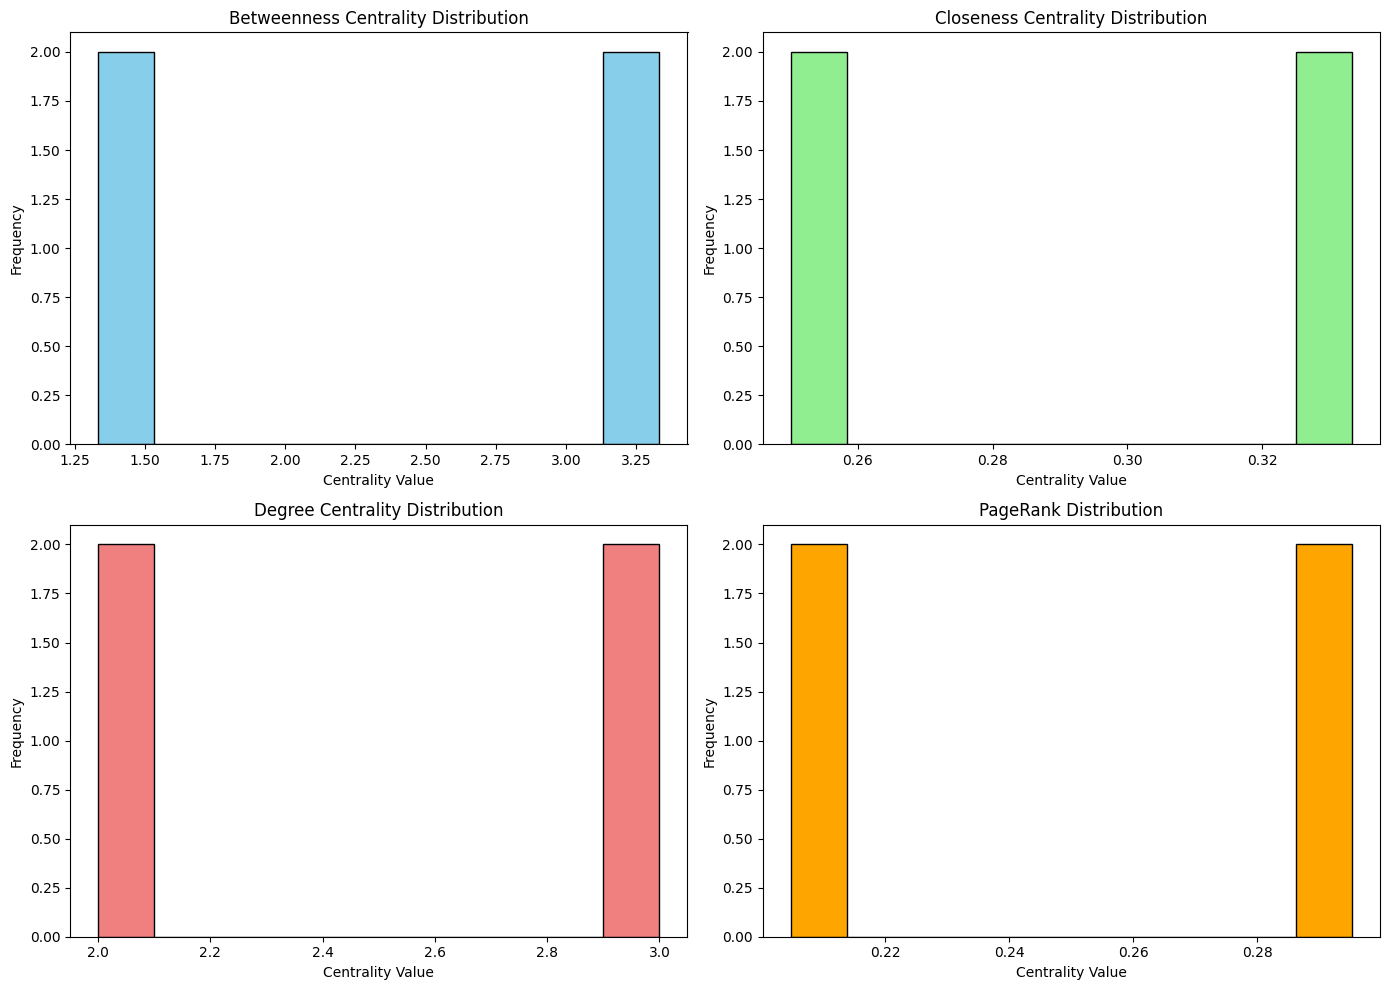

Top 5 Betweenness:
  JFK: 3.3333
  ORD: 3.3333
  LAX: 1.3333
  ATL: 1.3333

Top 5 Closeness:
  JFK: 0.3333
  ORD: 0.3333
  LAX: 0.2500
  ATL: 0.2500

Top 5 Degree:
  JFK: 3.0000
  ORD: 3.0000
  LAX: 2.0000
  ATL: 2.0000

Top 5 PageRank:
  JFK: 0.2952
  ORD: 0.2952
  LAX: 0.2048
  ATL: 0.2048



In [41]:
import matplotlib.pyplot as plt
import heapq

# Function to compute centralities for all nodes and compare them
def compare_centralities(flight_network):
    """
    Compute and compare centrality values for all nodes in the graph.
    Plot histograms of the centrality distributions.
    Return the top 5 nodes for each centrality measure.
    """
    # Initialize dictionaries to store centrality values
    betweenness = {}
    closeness = {}
    degree = {}
    pagerank = {}
    
    # Compute centrality measures for each node
    for node in flight_network:
        betweenness[node] = compute_betweenness_centrality(flight_network, node)
        closeness[node] = compute_closeness_centrality(flight_network, node)
        degree[node] = compute_degree_centrality(flight_network, node)
        pagerank[node] = compute_pagerank(flight_network, node)
    
    # Sort and extract top 5 airports for each measure
    top_5_betweenness = heapq.nlargest(5, betweenness, key=betweenness.get)
    top_5_closeness = heapq.nlargest(5, closeness, key=closeness.get)
    top_5_degree = heapq.nlargest(5, degree, key=degree.get)
    top_5_pagerank = heapq.nlargest(5, pagerank, key=pagerank.get)
    
    # Plot histograms for centrality distributions
    plt.figure(figsize=(14, 10))
    
    # Betweenness Centrality
    plt.subplot(2, 2, 1)
    plt.hist(betweenness.values(), bins=10, color='skyblue', edgecolor='black')
    plt.title("Betweenness Centrality Distribution")
    plt.xlabel("Centrality Value")
    plt.ylabel("Frequency")
    
    # Closeness Centrality
    plt.subplot(2, 2, 2)
    plt.hist(closeness.values(), bins=10, color='lightgreen', edgecolor='black')
    plt.title("Closeness Centrality Distribution")
    plt.xlabel("Centrality Value")
    plt.ylabel("Frequency")
    
    # Degree Centrality
    plt.subplot(2, 2, 3)
    plt.hist(degree.values(), bins=10, color='lightcoral', edgecolor='black')
    plt.title("Degree Centrality Distribution")
    plt.xlabel("Centrality Value")
    plt.ylabel("Frequency")
    
    # PageRank
    plt.subplot(2, 2, 4)
    plt.hist(pagerank.values(), bins=10, color='orange', edgecolor='black')
    plt.title("PageRank Distribution")
    plt.xlabel("Centrality Value")
    plt.ylabel("Frequency")
    
    plt.tight_layout()
    plt.show()
    
    # Return the top 5 nodes for each centrality measure
    results = {
        "Top 5 Betweenness": [(node, betweenness[node]) for node in top_5_betweenness],
        "Top 5 Closeness": [(node, closeness[node]) for node in top_5_closeness],
        "Top 5 Degree": [(node, degree[node]) for node in top_5_degree],
        "Top 5 PageRank": [(node, pagerank[node]) for node in top_5_pagerank],
    }
    
    return results

# Example flight network
flight_network = {
    'JFK': ['LAX', 'ORD', 'ATL'],
    'LAX': ['JFK', 'ORD'],
    'ORD': ['JFK', 'LAX', 'ATL'],
    'ATL': ['JFK', 'ORD']
}

# Call the function and display results
results = compare_centralities(flight_network)

# Print top 5 nodes for each centrality measure
for centrality, top_nodes in results.items():
    print(f"{centrality}:")
    for node, value in top_nodes:
        print(f"  {node}: {value:.4f}")
    print()

Creating flight network graph...
Graph created with 727 nodes and 36719 edges.
Computing centrality measures...


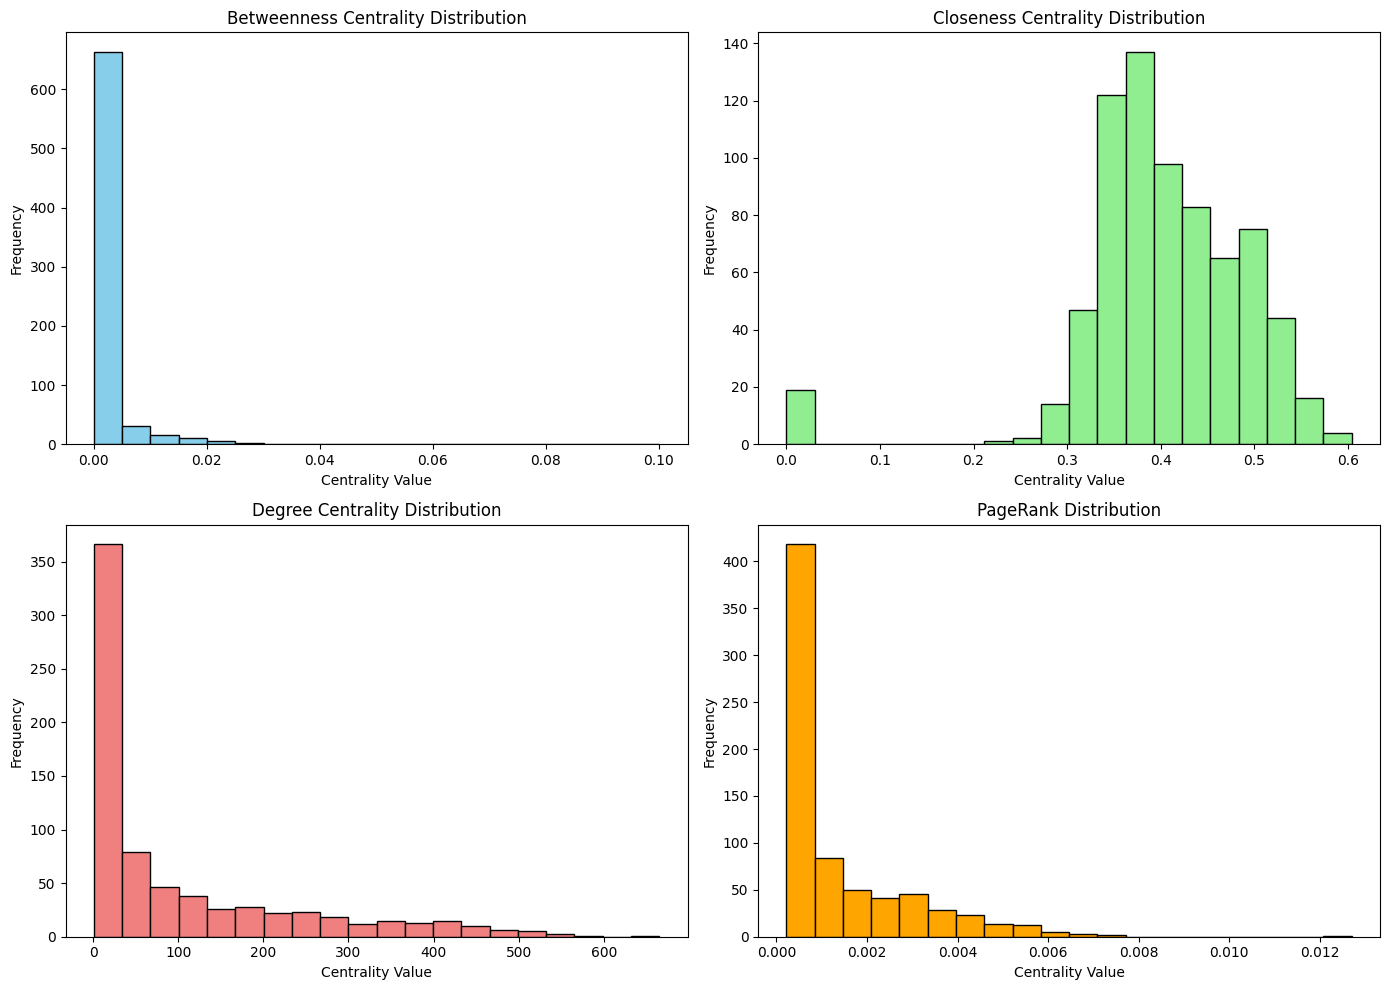

Top 5 Betweenness:
  YIP: 0.1001
  MSP: 0.0277
  MEM: 0.0268
  MCI: 0.0241
  SHV: 0.0222

Top 5 Closeness:
  YIP: 0.6043
  MSP: 0.5871
  MEM: 0.5776
  MCI: 0.5755
  STL: 0.5688

Top 5 Degree:
  YIP: 665.0000
  MSP: 583.0000
  MEM: 564.0000
  MCI: 539.0000
  ATL: 539.0000

Top 5 PageRank:
  YIP: 0.0127
  SHV: 0.0076
  MSP: 0.0076
  MEM: 0.0070
  MCI: 0.0070



In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import heapq

# Function 1: Create the flight network graph from DataFrame
def create_flight_graph(df):
    """
    Create a directed graph (DiGraph) from a DataFrame.
    Columns: 'Origin_airport', 'Destination_airport'
    """
    print("Creating flight network graph...")
    graph = nx.DiGraph()
    for _, row in df.iterrows():
        graph.add_edge(row['Origin_airport'], row['Destination_airport'])
    
    print(f"Graph created with {graph.number_of_nodes()} nodes and {graph.number_of_edges()} edges.")
    return graph

# Function 2: Compute Betweenness Centrality
def compute_betweenness(graph):
    """
    Compute Betweenness Centrality for all nodes.
    """
    return nx.betweenness_centrality(graph)

# Function 3: Compute Closeness Centrality
def compute_closeness(graph):
    """
    Compute Closeness Centrality for all nodes.
    """
    return nx.closeness_centrality(graph)

# Function 4: Compute Degree Centrality
def compute_degree(graph):
    """
    Compute Degree Centrality for all nodes.
    """
    return dict(graph.degree())

# Function 5: Compute PageRank Centrality
def compute_pagerank(graph):
    """
    Compute PageRank Centrality for all nodes.
    """
    return nx.pagerank(graph)

# Function 6: Compare Centralities and Plot
def compare_centralities(graph):
    """
    Compute and compare centrality values for all nodes in the graph.
    Plot histograms of the centrality distributions.
    Return the top 5 nodes for each centrality measure.
    """
    print("Computing centrality measures...")

    # Centrality Measures
    betweenness = compute_betweenness(graph)
    closeness = compute_closeness(graph)
    degree = compute_degree(graph)
    pagerank = compute_pagerank(graph)

    # Extract top 5 nodes for each measure
    top_5_betweenness = heapq.nlargest(5, betweenness, key=betweenness.get)
    top_5_closeness = heapq.nlargest(5, closeness, key=closeness.get)
    top_5_degree = heapq.nlargest(5, degree, key=degree.get)
    top_5_pagerank = heapq.nlargest(5, pagerank, key=pagerank.get)

    # Plot histograms for each measure
    plt.figure(figsize=(14, 10))

    plt.subplot(2, 2, 1)
    plt.hist(betweenness.values(), bins=20, color='skyblue', edgecolor='black')
    plt.title("Betweenness Centrality Distribution")
    plt.xlabel("Centrality Value")
    plt.ylabel("Frequency")

    plt.subplot(2, 2, 2)
    plt.hist(closeness.values(), bins=20, color='lightgreen', edgecolor='black')
    plt.title("Closeness Centrality Distribution")
    plt.xlabel("Centrality Value")
    plt.ylabel("Frequency")

    plt.subplot(2, 2, 3)
    plt.hist(degree.values(), bins=20, color='lightcoral', edgecolor='black')
    plt.title("Degree Centrality Distribution")
    plt.xlabel("Centrality Value")
    plt.ylabel("Frequency")

    plt.subplot(2, 2, 4)
    plt.hist(pagerank.values(), bins=20, color='orange', edgecolor='black')
    plt.title("PageRank Distribution")
    plt.xlabel("Centrality Value")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

    # Print top 5 nodes for each measure
    results = {
        "Top 5 Betweenness": [(node, betweenness[node]) for node in top_5_betweenness],
        "Top 5 Closeness": [(node, closeness[node]) for node in top_5_closeness],
        "Top 5 Degree": [(node, degree[node]) for node in top_5_degree],
        "Top 5 PageRank": [(node, pagerank[node]) for node in top_5_pagerank],
    }

    for centrality, top_nodes in results.items():
        print(f"{centrality}:")
        for node, value in top_nodes:
            print(f"  {node}: {value:.4f}")
        print()

    return results

# Main execution
if __name__ == "__main__":
    # Load the dataset
    df = df # Replace with correct path
    df = df.drop_duplicates()  # Clean duplicates

    # Step 1: Create flight graph
    flight_graph = create_flight_graph(df)

    # Step 2: Compute centralities and plot results
    centrality_results = compare_centralities(flight_graph)

## here's chatgpt's one 

In [49]:
# Function to compute Eigenvector Centrality
def compute_eigenvector_centrality(graph):
    """
    Compute Eigenvector Centrality for all nodes in the graph.
    """
    return nx.eigenvector_centrality_numpy(graph)

In [50]:
def compare_centralities(graph):
    """
    Compute and compare centrality values for all nodes in the graph.
    Plot histograms and return the top 5 nodes for each measure.
    """
    print("Computing centrality measures...")

    # Centrality Measures
    betweenness = compute_betweenness(graph)
    closeness = compute_closeness(graph)
    degree = compute_degree(graph)
    pagerank = compute_pagerank(graph)
    eigenvector = compute_eigenvector_centrality(graph)

    # Extract top 5 nodes for each measure
    top_5_betweenness = heapq.nlargest(5, betweenness, key=betweenness.get)
    top_5_closeness = heapq.nlargest(5, closeness, key=closeness.get)
    top_5_degree = heapq.nlargest(5, degree, key=degree.get)
    top_5_pagerank = heapq.nlargest(5, pagerank, key=pagerank.get)
    top_5_eigenvector = heapq.nlargest(5, eigenvector, key=eigenvector.get)

    # Combine results into DataFrame for easier comparison
    results_df = pd.DataFrame({
        "Node": graph.nodes(),
        "Betweenness": betweenness.values(),
        "Closeness": closeness.values(),
        "Degree": degree.values(),
        "PageRank": pagerank.values(),
        "Eigenvector": eigenvector.values(),
    })

    # Print top nodes for each measure
    print("\nTop 5 Nodes by Eigenvector Centrality:")
    for node in top_5_eigenvector:
        print(f"  {node}: {eigenvector[node]:.4f}")

    # Plot distributions using Seaborn
    plt.figure(figsize=(12, 8))
    sns.histplot(results_df["Eigenvector"], bins=20, kde=True, color="purple")
    plt.title("Eigenvector Centrality Distribution")
    plt.xlabel("Centrality Value")
    plt.ylabel("Frequency")
    plt.show()

    return results_df

In [52]:
if __name__ == "__main__":
    df = df

    # Step 1: Create flight graph
    flight_graph = create_flight_graph(df)

    # Step 2: Compare centralities (including Eigenvector Centrality)
    centrality_results = compare_centralities(flight_graph)

Creating flight network graph...
Graph created with 727 nodes and 36719 edges.
Computing centrality measures...


AmbiguousSolution: `eigenvector_centrality_numpy` does not give consistent results for disconnected graphs